In [1]:
import pandas as pd
import seaborn as sns

Data Importing ,Formating and Cleaning

In [85]:
data = pd.read_csv("effects-of-covid-19-on-trade-at-15-december-2021-provisional.csv", index_col="Date")
data.index = pd.to_datetime(data.index,infer_datetime_format=True,format="%d/%m/%Y")
data.drop(["Year"],axis=1,inplace=True)
data.head(10)

/tmp/ipykernel_4507/2586541472.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data.index = pd.to_datetime(data.index,infer_datetime_format=True,format="%d/%m/%Y")


,Direction,Weekday,Country,Commodity,Transport_Mode,Measure,Value,Cumulative
Date,,,,,,,,
2015-01-01,Exports,Thursday,All,All,All,$,104000000,104000000
2015-01-02,Exports,Friday,All,All,All,$,96000000,200000000
2015-01-03,Exports,Saturday,All,All,All,$,61000000,262000000
2015-01-04,Exports,Sunday,All,All,All,$,74000000,336000000
2015-01-05,Exports,Monday,All,All,All,$,105000000,442000000
2015-01-06,Exports,Tuesday,All,All,All,$,76000000,518000000
2015-01-07,Exports,Wednesday,All,All,All,$,59000000,577000000
2015-01-08,Exports,Thursday,All,All,All,$,111000000,688000000
2015-01-09,Exports,Friday,All,All,All,$,98000000,786000000


Covid Season Based on (2020-2021)

In [86]:
Covid_Seasons = data["2020-1-1":"2021-12-15"]

Selecting Country based on Data

In [4]:
China = Covid_Seasons.loc[Covid_Seasons["Country"]=='China']
United_State = Covid_Seasons.loc[Covid_Seasons["Country"]=='United States']
Europe = Covid_Seasons.loc[Covid_Seasons["Country"]=='European Union (27)']

Counting Trading Ammount($)

In [12]:
Chinas_Values = China.groupby('Direction')[["Value"]].sum().iloc[:-1]
United_State_Values = United_State.groupby('Direction')[["Value"]].sum()
Europe_Values = Europe.groupby('Direction')[["Value"]].sum()

Visulaize Neumoric Data based on Country

In [78]:
Chinas_Values

,Value
Direction,
Exports,62280625000


In [79]:
Europe_Values

,Value
Direction,
Exports,7854000000


In [80]:
United_State_Values

,Value
Direction,
Exports,16527368000


##Visulaize total Ammount of Export Value($)

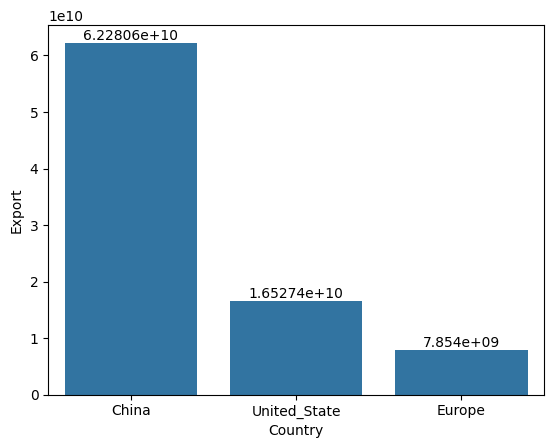

In [81]:
Visulaize = pd.DataFrame({'Country':["China","United_State","Europe"],"Export":[62280625000,16527368000,7854000000]})
ax = sns.barplot(x='Country',y="Export",data=Visulaize)
for bar in ax.containers:
    ax.bar_label(bar)